<a href="https://colab.research.google.com/github/rikanga/Easy-Numpy/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dimensionality Reduction, Feature Extraction, and Manifold Learning**

**(Réduction de dimension, extration de caractéristiques et l'apprentissage varié**

Nous savons que l'apprentissage supervisé est souvent aussi utilisé pour:


*   Visualiser les données
*   Compresser les données
*   Représenter les données de manière plus informatique

Et un moyen de faire est d'utiliser souvent et largement **princiapl component analysis(PCA)** et on peut ajouter deux autres algorithmes:

* **Non-negative matrix factorization(NMF)**
* **t-NSE**



### **Principal Component Analysis**

In [1]:
!pip install mglearn

     |████████████████████████████████| 540 kB 5.1 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=ad6afc15006c87b912206192820aeafc7b8399df12f15d493cbc9bd77d1f9c1d
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


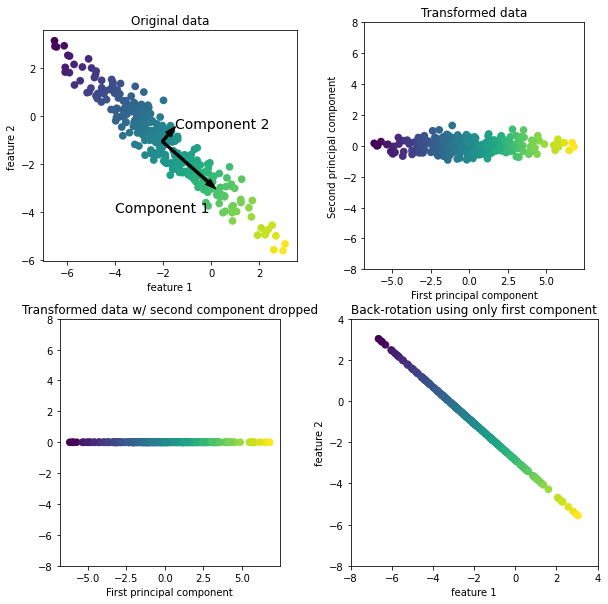

In [2]:
import mglearn
mglearn.plots.plot_pca_illustration()

Le principe du **PCA** est de trouver un nouveau dataset avec les données les moins corréléés possible comme on le voit sur la second feature contrairement à la figure avec les données originales.

#### **Applications(Visualisation)**

L'une de grandes applications du **PCA** est la visualisation des données

On va faire de la visualisation des données grâce aux histogrammes pour voir les différentes correspondances des données entre la classe maline et bénine

In [3]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()

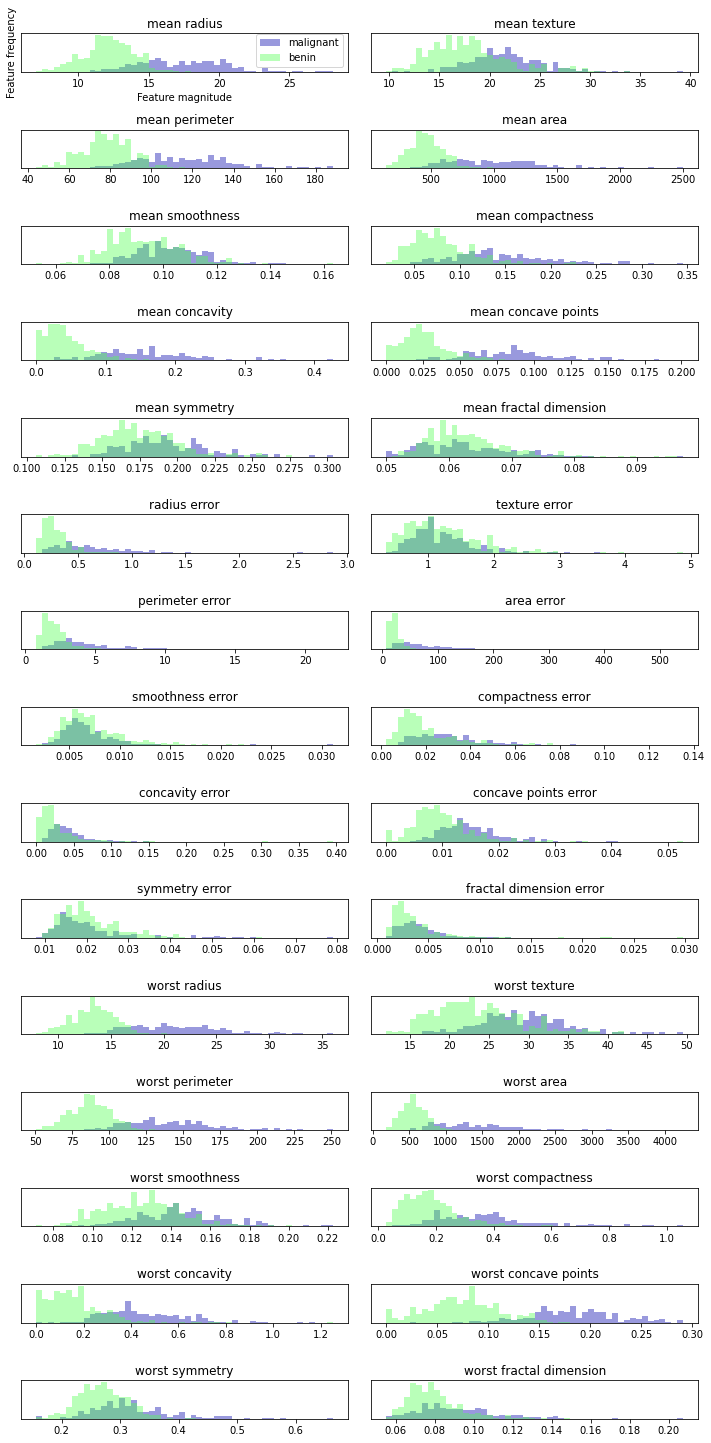

In [5]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))

malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()

for i in range(30):
  _, bin = np.histogram(cancer.data[:, i], bins=50)
  ax[i].hist(malignant[:, i], bins=bin, color=mglearn.cm3(0), alpha=.4)
  ax[i].hist(benign[:, i], bins=bin, color=mglearn.cm3(2), alpha=.4)
  ax[i].set_title(cancer.feature_names[i])
  ax[i].set_yticks(())
ax[0].set_xlabel('Feature magnitude')
ax[0].set_ylabel('Feature frequency')
ax[0].legend(['malignant', 'benin'], loc='best')
fig.tight_layout()

On voit maintenant comment sont distribués les données de chaque caractéristique sur la classe **malignant** et **benin** et nous trouvons que la variable **worst concave points** est plus informative pour comprendre les distributions des données de notre dataset.

On va  à présent apprendre de toutes ces données à l'aide d'un seul **scatter** grâce au **PCA**

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

**Importing the PCA class**

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=2)
# keep the first 
pca.fit(X_scaled)

PCA(n_components=2)

In [10]:
# transform data onto the first two principal componets
X_pca = pca.transform(X_scaled)

In [11]:
print("Original data shape", str(X_scaled.shape))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original data shape (569, 30)
Reduced shape: (569, 2)


**Plotting  and visualizing the two first component**

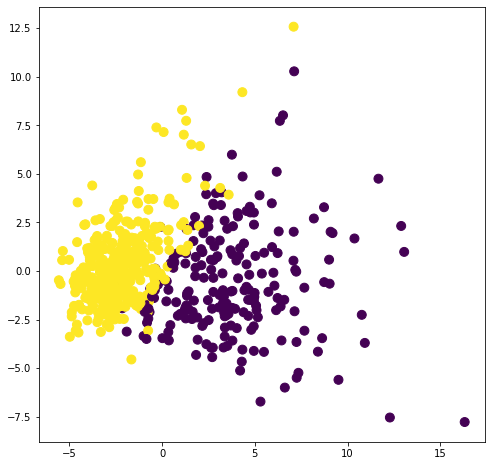

In [12]:
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cancer.target, s=80)

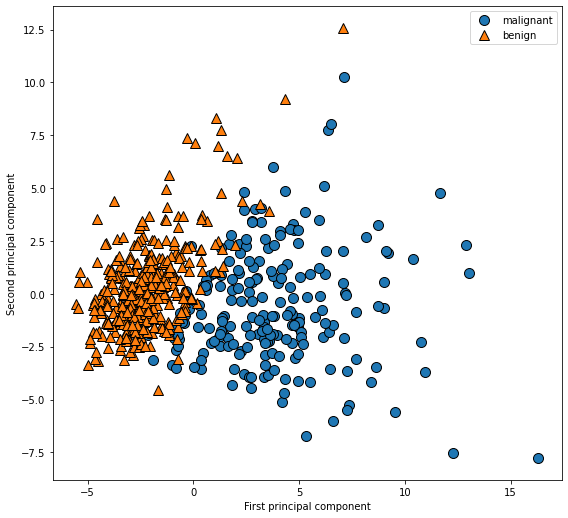

In [13]:
fig = plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect('equal')
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
fig.tight_layout()

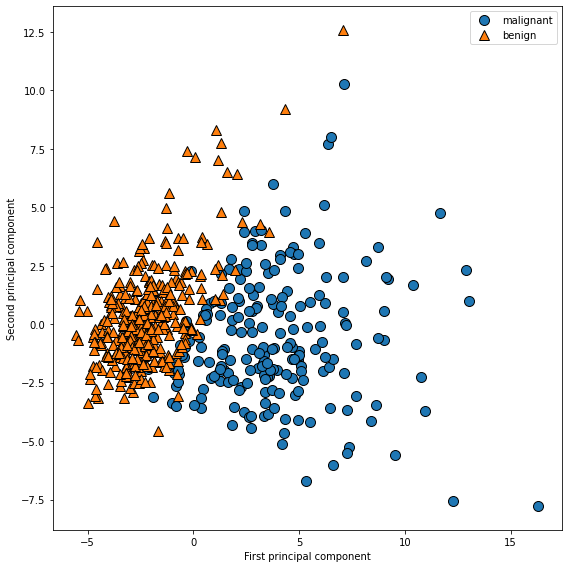

In [14]:
fig = plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
# plt.gca().set_aspect('equal')
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
fig.tight_layout()

**comporent used shape**

In [15]:
print("PCA component shape:\n", pca.components_.shape)

PCA component shape:
 (2, 30)


In [16]:
print("PCA component:\n", pca.components_)

PCA component:
 [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


**Show the PCA component coefficient**

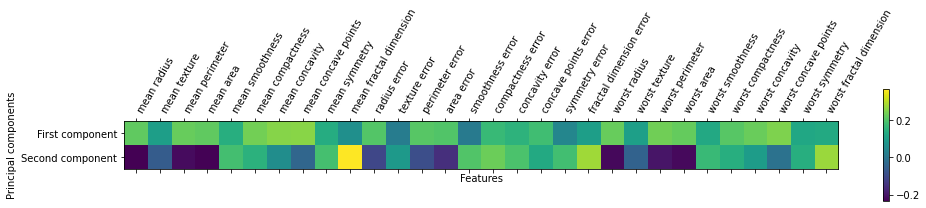

In [17]:
plt.matshow(pca.components_)
plt.xticks(range(30), cancer.feature_names, rotation=60, ha='left')
plt.yticks([0, 1], ['First component', 'Second component'])
plt.xlabel('Features')
plt.ylabel('Principal components')
plt.colorbar()
plt.show()

On voit que les coéfficients du premier composant ont tous le même signe donc les élèments y sont biens corrélés

### **Application(Extraction des caractéristiques)**

In [18]:
from sklearn.datasets import fetch_lfw_people

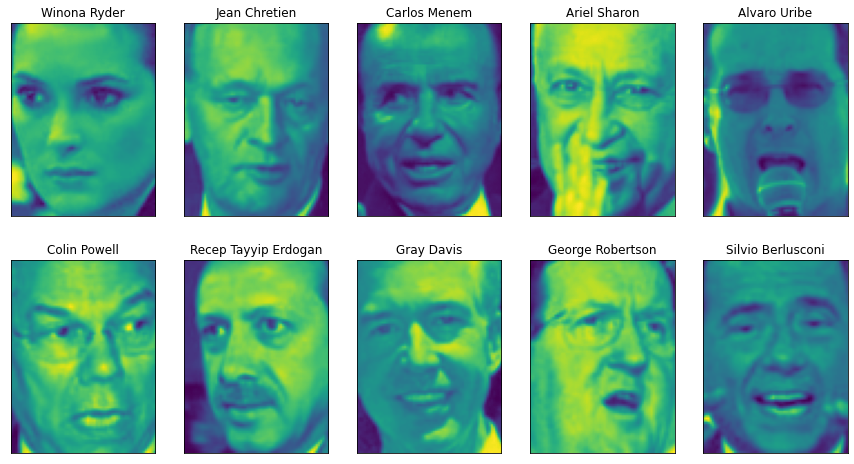

In [19]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks':(), 'yticks':()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
  ax.imshow(image)
  ax.set_title(people.target_names[target])

On a 3023 images et 87 *65 pixels par personnes.
Et il y'a dans notre dataset 62 personnes

In [20]:
print("people.images.shape: ", people.images.shape)
print("Number of classes ", len(people.target_names))

people.images.shape:  (3023, 87, 65)
Number of classes  62


In [21]:
# faces per person
counts = np.bincount(people.target)
data = {}

In [22]:
for name, count in zip(people.target_names, counts):
  print(name, count, sep='  ')
  data[name] = count

Alejandro Toledo  39
Alvaro Uribe  35
Amelie Mauresmo  21
Andre Agassi  36
Angelina Jolie  20
Ariel Sharon  77
Arnold Schwarzenegger  42
Atal Bihari Vajpayee  24
Bill Clinton  29
Carlos Menem  21
Colin Powell  236
David Beckham  31
Donald Rumsfeld  121
George Robertson  22
George W Bush  530
Gerhard Schroeder  109
Gloria Macapagal Arroyo  44
Gray Davis  26
Guillermo Coria  30
Hamid Karzai  22
Hans Blix  39
Hugo Chavez  71
Igor Ivanov  20
Jack Straw  28
Jacques Chirac  52
Jean Chretien  55
Jennifer Aniston  21
Jennifer Capriati  42
Jennifer Lopez  21
Jeremy Greenstock  24
Jiang Zemin  20
John Ashcroft  53
John Negroponte  31
Jose Maria Aznar  23
Juan Carlos Ferrero  28
Junichiro Koizumi  60
Kofi Annan  32
Laura Bush  41
Lindsay Davenport  22
Lleyton Hewitt  41
Luiz Inacio Lula da Silva  48
Mahmoud Abbas  29
Megawati Sukarnoputri  33
Michael Bloomberg  20
Naomi Watts  22
Nestor Kirchner  37
Paul Bremer  20
Pete Sampras  22
Recep Tayyip Erdogan  30
Ricardo Lagos  27
Roh Moo-hyun  32
Rudol

In [23]:
import pandas as pd

In [24]:
faces = pd.Series(data)

In [25]:
faces.sort_values(ascending=False).head(30)

George W Bush                530
Colin Powell                 236
Tony Blair                   144
Donald Rumsfeld              121
Gerhard Schroeder            109
Ariel Sharon                  77
Hugo Chavez                   71
Junichiro Koizumi             60
Jean Chretien                 55
John Ashcroft                 53
Serena Williams               52
Jacques Chirac                52
Vladimir Putin                49
Luiz Inacio Lula da Silva     48
Gloria Macapagal Arroyo       44
Arnold Schwarzenegger         42
Jennifer Capriati             42
Lleyton Hewitt                41
Laura Bush                    41
Hans Blix                     39
Alejandro Toledo              39
Nestor Kirchner               37
Andre Agassi                  36
Alvaro Uribe                  35
Tom Ridge                     33
Silvio Berlusconi             33
Megawati Sukarnoputri         33
Vicente Fox                   32
Roh Moo-hyun                  32
Kofi Annan                    32
dtype: int

In [26]:
mask = np.zeros(people.target.shape, dtype=bool)

In [45]:
c = 0
for target in np.unique(people.target):
  mask[np.where(people.target == target)[0][:50]] = 1
  print(target)
  c += 1
  if c == 62:
    break

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61


In [36]:
x_people = people.data[mask]
y_people = people.target[mask]

In [38]:
X_people = x_people / 255.

### **Reconnaissance faciale**

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
X_people.shape

(2063, 5655)

In [47]:
np.unique(mask, return_counts=True)

(array([False,  True]), array([ 960, 2063]))

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people,
                                                    stratify=y_people, random_state=0)

In [51]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [52]:
print("Test set score of 1-nn", knn.score(X_test, y_test))

Test set score of 1-nn 0.23255813953488372


La nous constatons que nous ne pouvons pas utiliser des algos d'apprentissage supervisé pour apprendre sur des images d'où nous allons utiliser **PCA** pour nous faciliter la tâce

#### **Option de blanchiment**

comme **StandardScaler** pour faire du pré-traitement, elle permet de pivoter les données et faire aussi leurs  rédimensionnement.

A la fin on trouve un panneau central des données sous forme de cercle et non d'ellipse

**Illustration**

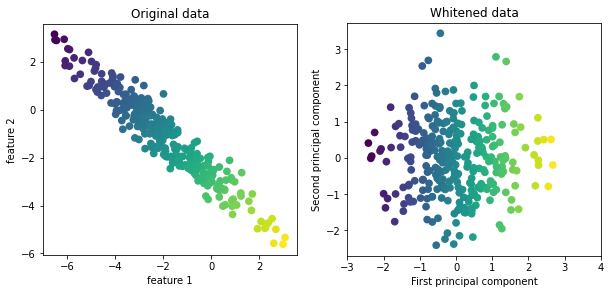

In [56]:
mglearn.plots.plot_pca_whitening()

In [58]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)

In [61]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [62]:
print("X_train_pca.shape", X_train_pca.shape)

X_train_pca.shape (1547, 100)


In [63]:
X_train.shape

(1547, 5655)

Les nouvelles données ont 100 caractéristiques et maintenant nous pouvons éssayer encore d'entrainer notra modèle **KNeighbors**